In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.preprocessing import MinMaxScaler

In [59]:
data = pd.read_csv('data/titanic.csv')

# Data preprocessing

In [60]:
data.head(n=10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [61]:
data.shape

(887, 8)

check for missing values

In [62]:
print(data.isna().sum())
print()
print(data.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


remove the `name` column since it is useless to us

In [63]:
data = data.drop('Name', axis=1)

encode the `sex` column

In [64]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [65]:
data['Sex'].replace(['male', 'female'], ['0', '1'], inplace=True)

In [66]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


check class imbalance

<Axes: xlabel='Survived', ylabel='Count'>

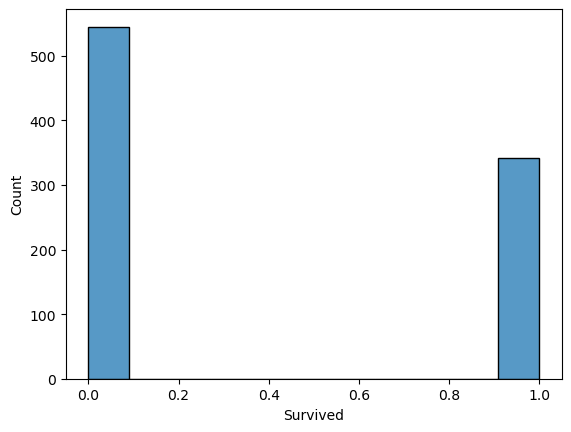

In [67]:
sns.histplot(data, x=data['Survived'])

In [68]:
print(f"Survived %: {(data[data['Survived'] == 1].shape[0] / data.shape[0]) * 100}")
print(f"Deceased %: {(data[data['Survived'] == 0].shape[0] / data.shape[0]) * 100}")

Survived %: 38.55693348365276
Deceased %: 61.44306651634723


## Data normalization

In [69]:
import plotly.figure_factory as ff
import plotly.express as px

In [70]:
from copy import deepcopy

In [71]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Age

In [72]:
fig = px.histogram(data, x="Age")
fig.show()

In [73]:
data = data[data['Age'] < 74]

In [74]:
fig = px.histogram(data, x="Age")
fig.show()

#### Mean/Std

In [75]:
data_age_mean = data['Age'].mean(axis=0)
data_age_std = data['Age'].std(axis=0)

In [76]:
data['Age'] = (data['Age']-data_age_mean)/data_age_std

In [77]:
fig = px.histogram(data, x="Age")
fig.show()

### Fare

In [78]:
fig = px.histogram(data, x="Fare", color="Pclass")
fig.show()

In [79]:
data = data[data['Fare'] < 500]

In [80]:
fig = px.histogram(data, x="Fare", color="Pclass")
fig.show()

#### Log scalling

In [81]:
data['Fare'] = data['Fare'].apply(lambda x: np.log(x+1))

In [82]:
fig = px.histogram(data, x="Fare")
fig.show()

In [83]:
# data_fare_mean = data['Fare'].mean(axis=0)
# data_fare_std = data['Fare'].std(axis=0)
# data['Fare'] = (data['Fare']-data_fare_mean)/data_fare_std

In [84]:
# data.describe()

In [85]:
# fig = px.histogram(data, x="Fare")
# fig.show()

## Split dataset

In [86]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.383220,2.310658,-0.001455,0.528345,0.384354,2.954296
std,0.486447,0.834065,1.001387,1.107088,0.809075,0.953365
min,0.000000,1.000000,-2.074126,0.000000,0.000000,0.000000
25%,0.000000,2.000000,-0.671025,0.000000,0.000000,2.188856
50%,0.000000,3.000000,-0.097746,0.000000,0.000000,2.737881
75%,1.000000,3.000000,0.618852,1.000000,0.000000,3.465736
max,1.000000,3.000000,2.983628,8.000000,6.000000,5.575949


In [87]:
from sklearn.model_selection import train_test_split

70% 30%

In [88]:
data['Sex'] = data['Sex'].astype('int64')
y = data['Survived']
x = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

In [89]:
print(y.shape)
print(x.shape)

print(x.dtypes)

(882,)
(882, 6)
Pclass                       int64
Sex                          int64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


In [90]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=420)

In [91]:
# print(len(x_train), len(y_train))
# print(len(x_temp), len(y_temp))

In [92]:
# x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, train_size=0.5, random_state=420)

In [93]:
# print(len(x_val), len(y_val))
# print(len(x_test), len(y_test))

In [94]:
x_train.to_csv('data/train/data.csv', index=False)
y_train.to_csv('data/train/labels.csv', index=False)

x_val.to_csv('data/val/data.csv', index=False)
y_val.to_csv('data/val/labels.csv', index=False)

# x_test.to_csv('data/test/data.csv', index=False)
# y_test.to_csv('data/test/labels.csv', index=False)

<Axes: xlabel='Survived', ylabel='Count'>

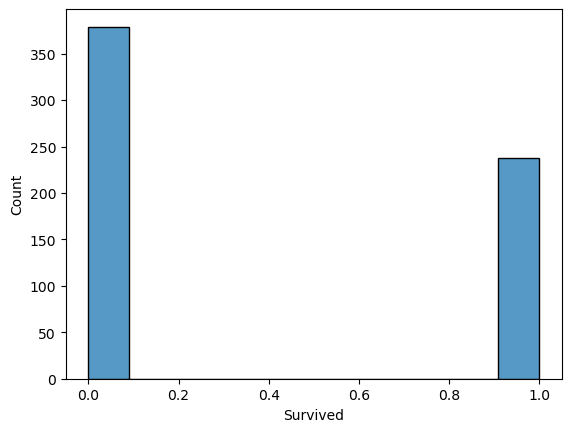

In [95]:
sns.histplot(data, x=y_train)

<Axes: xlabel='Survived', ylabel='Count'>

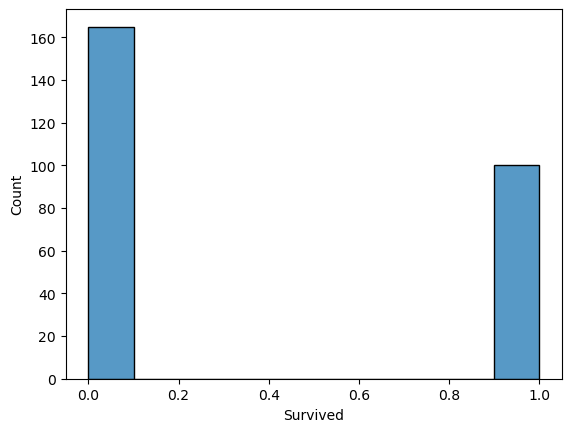

In [96]:
sns.histplot(data, x=y_val)

In [97]:
#sns.histplot(data, x=y_test)

# Playground

In [98]:
print(data['Parents/Children Aboard'].sort_values().unique())
print(data['Siblings/Spouses Aboard'].sort_values().unique())

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 8]


In [99]:
data[data['Siblings/Spouses Aboard'] == 8]

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
158,0,3,0,-1.745923,8,2,4.256322
179,0,3,1,-1.530944,8,2,4.256322
200,0,3,0,-0.886005,8,2,4.256322
322,0,3,0,-0.671025,8,2,4.256322
788,0,3,1,-0.599366,8,2,4.256322
842,0,3,0,-0.814345,8,2,4.256322
859,0,3,1,-1.100985,8,2,4.256322


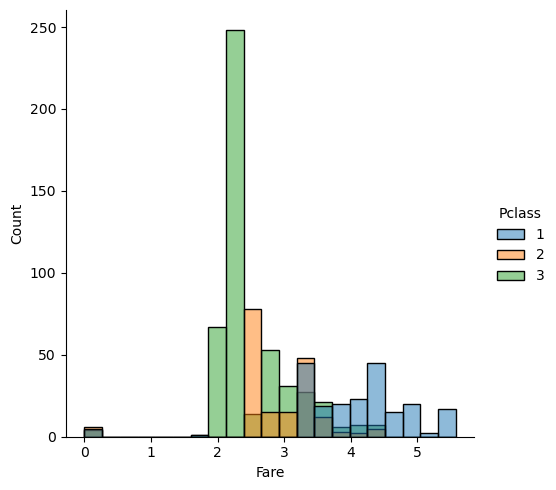

In [100]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Skalovanie hodnot stlpca 'Fare' do rozsahu (0, 1)

In [101]:
data['Fare'].describe()

count    882.000000
mean       2.954296
std        0.953365
min        0.000000
25%        2.188856
50%        2.737881
75%        3.465736
max        5.575949
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

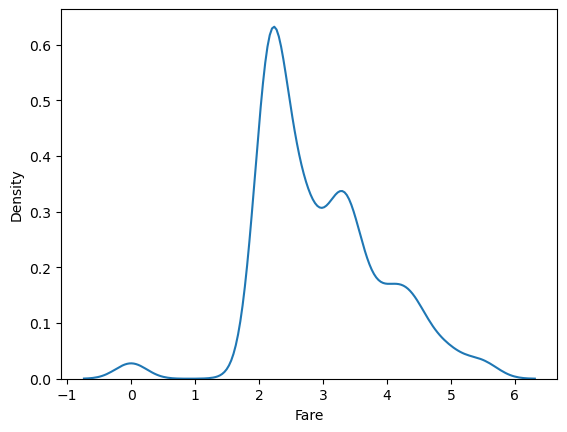

In [102]:
sns.kdeplot(data['Fare'])

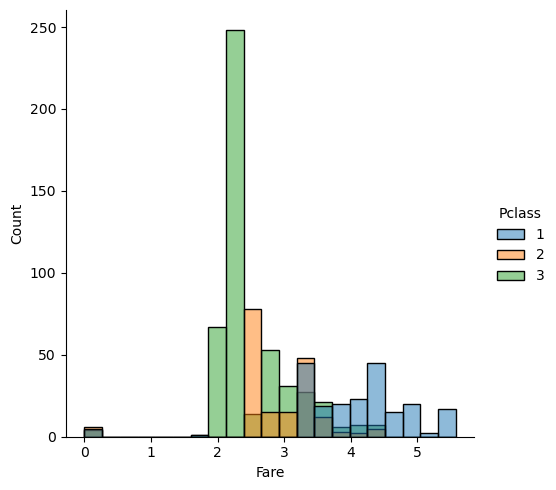

In [103]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [104]:
data['Fare'].sort_values().tail(10)

697    5.431646
554    5.431646
297    5.515527
117    5.515527
738    5.573579
309    5.573579
339    5.575949
87     5.575949
27     5.575949
435    5.575949
Name: Fare, dtype: float64

In [105]:
data = data[data['Fare'] < 500]

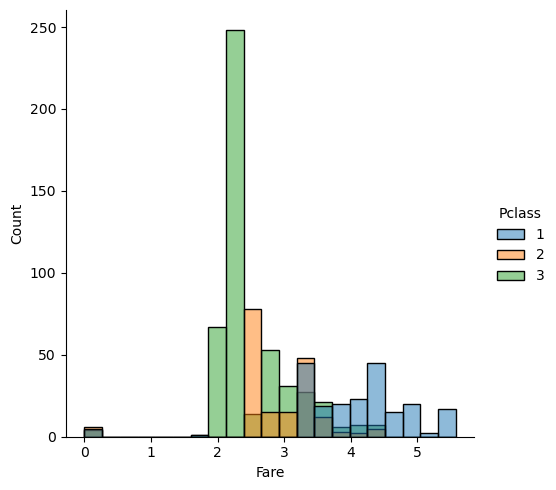

In [106]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [107]:
#scaler = MinMaxScaler()
#data['Fare'] = scaler.fit_transform(data['Fare'].values.reshape(-1,1))

In [108]:
data['Fare'].describe()

count    882.000000
mean       2.954296
std        0.953365
min        0.000000
25%        2.188856
50%        2.737881
75%        3.465736
max        5.575949
Name: Fare, dtype: float64

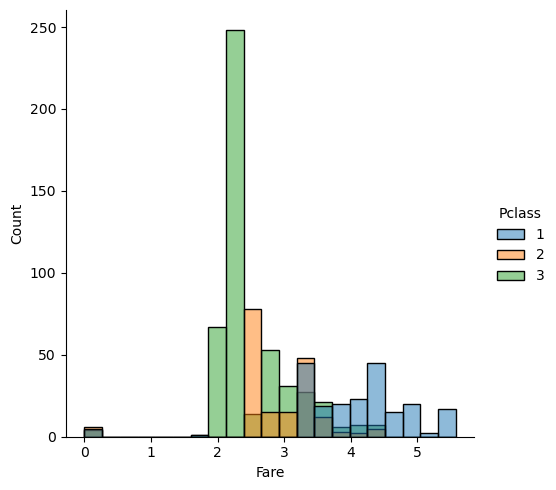

In [109]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Normalizacia stlpca 'Fare' pomocou mean a variance 

In [110]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: 2.9542956204252824
variance: 0.9089054992826094


In [111]:
data['Fare'] = data['Fare'] - fare_mean
data['Fare'] = data['Fare'] / fare_variance

In [112]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: -3.141855634313368e-16
variance: 1.100224391632891


<Axes: xlabel='Fare', ylabel='Density'>

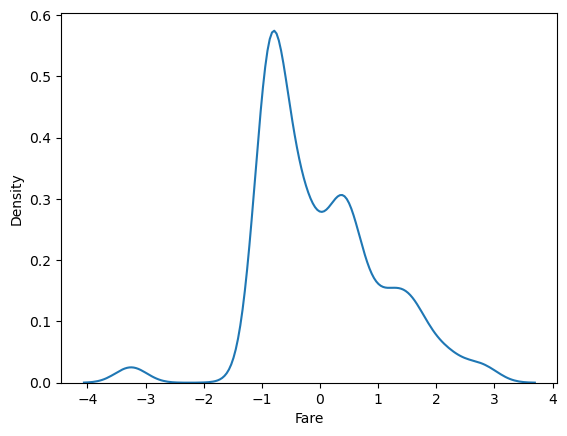

In [113]:
sns.kdeplot(data['Fare'])

## Zobrazenie dat po ukonceni predspracovania

In [114]:
data.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,-0.527706,1,0,-0.928680
1,1,1,1,0.618852,1,0,1.459225
2,1,3,1,-0.241066,0,0,-0.842155
3,1,1,1,0.403873,1,0,1.140425
4,0,3,0,0.403873,0,0,-0.826853
5,0,3,0,-0.169406,0,0,-0.778302
6,0,1,0,1.765410,0,0,1.114966
7,0,3,0,-1.960903,3,1,0.154197
8,1,3,1,-0.169406,0,2,-0.504279
9,1,2,1,-1.100985,1,0,0.530278
